<a href="https://colab.research.google.com/github/hakiozdem/Cyber-Security-Data-Scientist-Odev-7-Malicious-Url/blob/main/odev_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber Security Data Scientist Ödev 7
## Malicious Phishing Veri Analizi ve Model oluşturma

Ödev olarak bize bir malicious_phish.csv dosyası verildi, bunun üzerinden veri ön işleme, model oluşturma gibi işlemleri yapmamız istendi.

### 1. Veri Ön İşleme

In [7]:
# kullanılabilecek kütüphaneleri içeri alma
import pandas as pd
import missingno as msno
import numpy as np

In [11]:
df = pd.read_csv("malicious_phish.csv")
df.head(100)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
95,http://worldoftanks.ru/ru/content/guide/paymen...,benign
96,http://www.artedesignsas.it/catalogo.html?page...,defacement
97,en.wikipedia.org/wiki/Lloyd_Bacon,benign
98,http://serverfault.com/questions/682832/squid-...,benign


Elimizde tiplerin ve kullanılan URL'lerin bulunduğu bir veri kümesi var.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


## Eksik veri analizi

In [13]:
df.isnull().sum()

url     0
type    0
dtype: int64


Üstte yazdığım kod satırına göre eksik verimiz yok. Düzeltilmesi gereken bir veri olmaması işimizi kolaylaştıracaktır. Eğer eksik veri olsaydı missingno kütüphanesinin bar fonksiyonu ile yerlerini rahatça tespit edecektim. Örnek kod:

<Axes: >

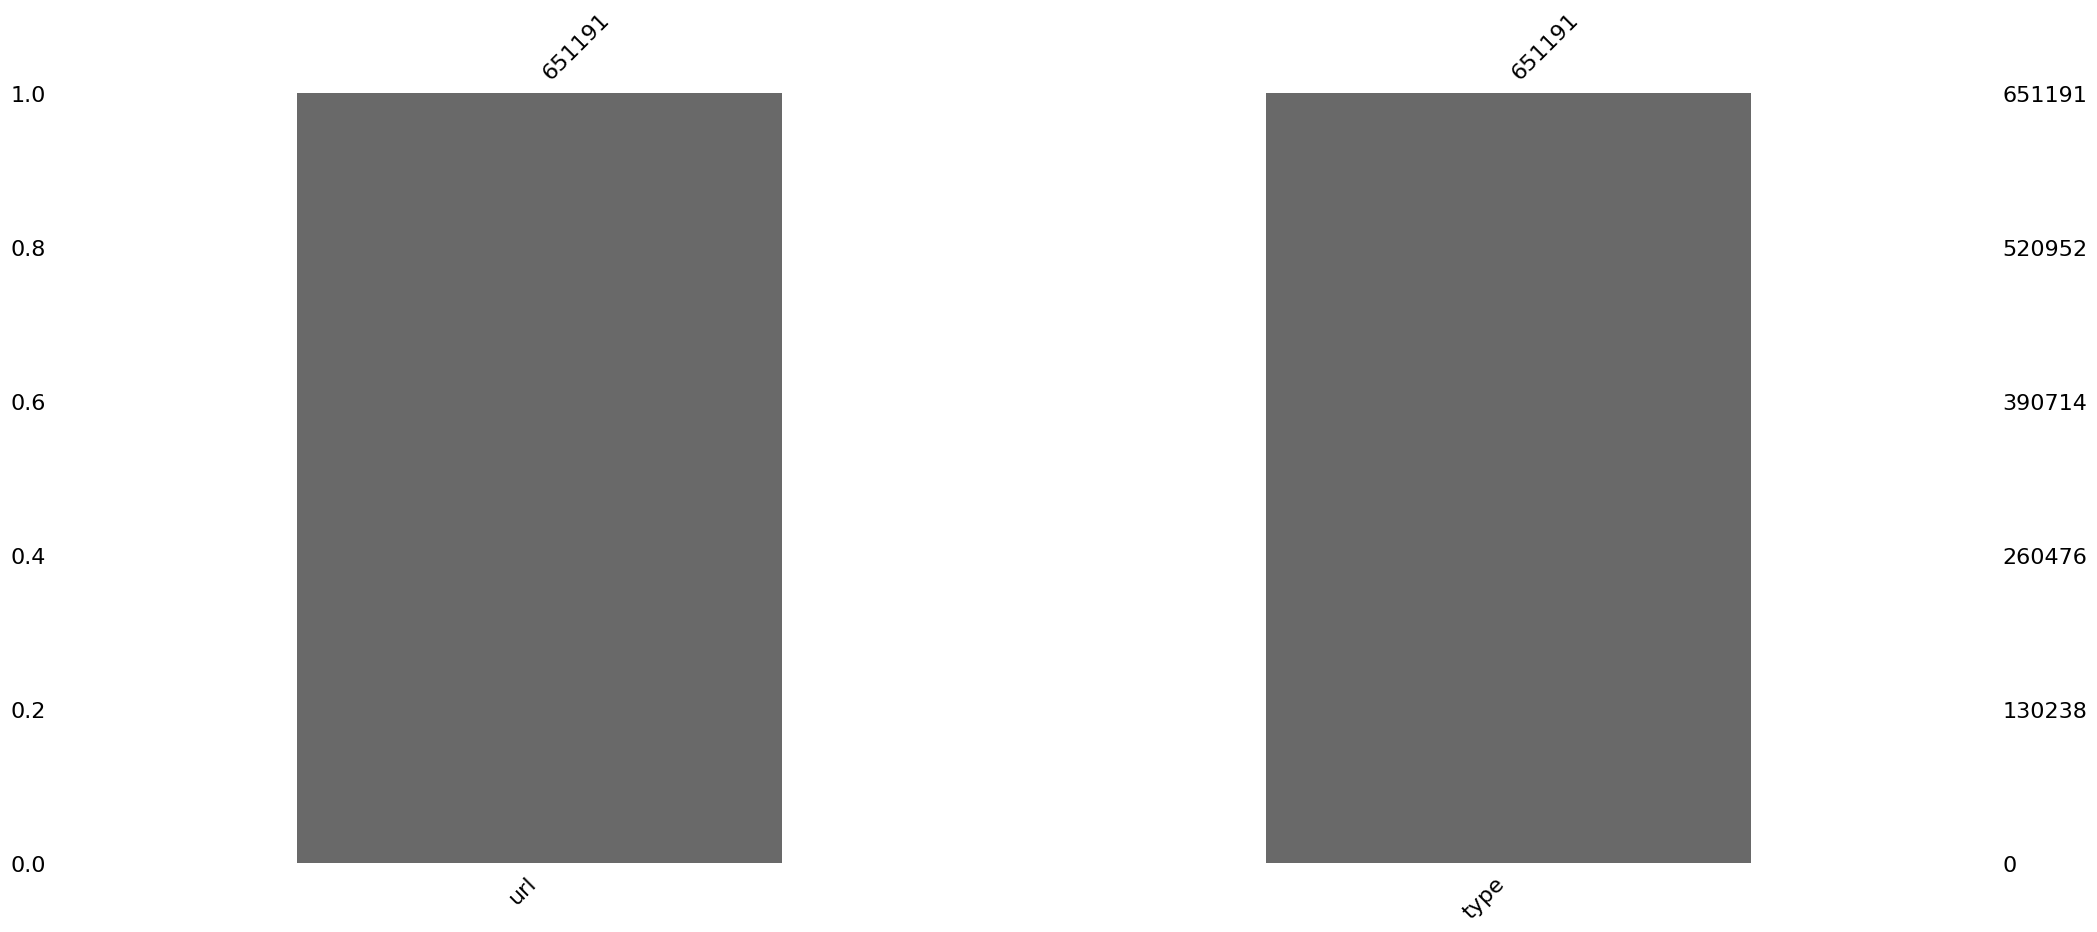

In [14]:
msno.bar(df)

Bu grafikte boşluklar bulunsaydı, eksik veriler ve karşılıkları ile aralarındaki ilişkiyi tespit ederek işlem yapacaktım. Ancak eksik veri bulunmaması sebebiyle bu aşamayı atladım. Yine de örnek olması açısından bu kod parçasını da oluşturmak istedim

#### Type Objesinin gözlemleri
Type Objesi tekrarlı bir yapıda, ne tarz anahtar kelimeler barındırdğını kontrol ettim.

In [15]:
df.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

- Phishing(Oltalama)
- Bening(Tehlikesiz)
- Defacement(Tahribat)
- Malware(virüs)

olarak türler listelenmiş oldu. Bu türleri One-Hot veya Label Encoding şekline çevirip kullanmamız daha verimli olacaktır

#### Encoding İşlemi

Encoding kısmında OneHot dönüşümünün daha verimli olup iyi sonuç vereceğini düşündüm. Çünkü tabloda ek sütun açarak işlemi sürdürmesinin daha iyi sonuç vereceğini düşünüyorum.

In [16]:
dff=pd.get_dummies(df,columns=["type"],prefix=["type"],dtype="int64")
dff.head()

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0


Şimdi yapılabilecek çoğu ön işleme işini yapmış bulunuyoruz. Çünkü eksik verimiz yok, normalizasyon yapılabilecek sayısal veriler yok. Gereksiz veya aykırı veri analizi yapamıyoruz. Şimdi veriyi gölmeye geçebilirim.


#### Veriyi Train ve Test olarak bölme

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
independent = dff["url"]
dependent = dff.drop(["url"],axis=1)
dependent


,type_benign,type_defacement,type_malware,type_phishing
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
651186,0,0,0,1
651187,0,0,0,1
651188,0,0,0,1
651189,0,0,0,1


Şimdi önceki denemelerime göre sadece URL'leri test olarak modele koyamıyoruz. Benim yaptığım işlemde bağımsız değişkenler URL'ler ve bağımlılar tipleri olduğu için metin verisini TF-IDF vektörü ile sayısallaştırmam gerekiyor.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
iindependent = tf_idf.fit_transform(independent)

In [ ]:
iindependent

<651191x590757 sparse matrix of type '<class 'numpy.float64'>'
	with 5362784 stored elements in Compressed Sparse Row format>

In [ ]:
# Veri Bölme İşlemi
x_train,x_test,y_train,y_test=train_test_split(iindependent,dependent,test_size=0.3, random_state=50)

In [ ]:
x_train

<455833x590757 sparse matrix of type '<class 'numpy.float64'>'
	with 3751780 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

,type_benign,type_defacement,type_malware,type_phishing
565173,1,0,0,0
186918,1,0,0,0
507317,1,0,0,0
440025,1,0,0,0
84751,1,0,0,0
...,...,...,...,...
385156,0,1,0,0
321502,1,0,0,0
441633,1,0,0,0
239499,1,0,0,0


In [ ]:
x_test

<195358x590757 sparse matrix of type '<class 'numpy.float64'>'
	with 1611004 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

,type_benign,type_defacement,type_malware,type_phishing
485488,1,0,0,0
267275,1,0,0,0
444024,1,0,0,0
428879,0,1,0,0
509742,1,0,0,0
...,...,...,...,...
190315,0,1,0,0
545866,0,0,1,0
635625,0,0,0,1
105937,1,0,0,0


Artık verimizi bağımlı ve bağımsız değişkenlere göre, train ve test sınıflarımızı oluşturduk, model üzerinde test edebiliriz.

#### RandomForestClassifier Modeli
Normal koşullarda NLP işlemlerinde daha iyi sonuç verdiğini okumuştum. İlk aşamada veriyi aşırı ön işlemeye sokmadan URL'lerin saf hali ile bir model oluşturdum.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
accuracy_score(y_test,y_pred)
# Burada bu yöntem ile nasıl durduğunu denerken elde ettiğim minik bir sonuç, güncel değildir model tam olarak çalışmamaktadır.

0.9522546419098143

Accuracy Score yüksek çıktı, ancak altta göreceksiniz ki Confission Matrix çalışmayacak. Burada belki veriyi daha çok işlemeyi deneyebiliriz. Son bir minik çalışma yapacağım kendi bilgilerim ile. "https","http" ve "www" kısımlarını kaldırıp tekrar deneyeceğim.

## Tekrar bir veri ön işlemesi

In [32]:
df_tekrar = dff.copy()

In [33]:
df_tekrar

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1


In [22]:
# https ve www uzantılarının kaldırılması
import re
https_pattern = re.compile(r"https?://")
for i in range(len(df_tekrar)):
  string = df_tekrar["url"][i]
  if https_pattern.search(string):
    new_url = re.sub(https_pattern,"",string)
    df_tekrar["url"][i] = new_url
  if "www." in string:
    new_url = re.sub("www.","",string)
    df_tekrar["url"][i] = new_url

df_tekrar

<ipython-input-22-8b616bb243fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tekrar["url"][i] = new_url
<ipython-input-22-8b616bb243fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tekrar["url"][i] = new_url


,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,0,1,0,0
4,adventure-nicaragua.net/index.php?option=com_m...,0,1,0,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1
651188,gamespot.com/xbox360/action/deadspace/,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1


In [23]:
# http uzantısının kaldırılması
df_tekrar["url"] = df_tekrar["url"].str.replace("http://","")
df_tekrar

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,garage-pirenne.be/index.php?option=com_content...,0,1,0,0
4,adventure-nicaragua.net/index.php?option=com_m...,0,1,0,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1
651188,gamespot.com/xbox360/action/deadspace/,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1


Biraz daha araştırınca urllib kütüphanesini buldum. Onunla verisetimi zenginleştirmeye çalışacağım. URL ile yapılan çalışmaları incelediğimde çok detaylı işlemeler yapılabiliyor. Ancak o seviyede bilgim olmadığı için kendim yanlış da olsa ayrıca politikalar izlemeye çalışacağım.

In [34]:
from urllib.parse import urlparse

In [35]:
df_tekrar['scheme'] = df_tekrar['url'].apply(lambda x: urlparse(x).scheme)
df_tekrar['netloc'] = df_tekrar['url'].apply(lambda x: urlparse(x).netloc)
df_tekrar['path'] = df_tekrar['url'].apply(lambda x: urlparse(x).path)
df_tekrar['query'] = df_tekrar['url'].apply(lambda x: urlparse(x).query)


In [36]:
df_tekrar

,url,type_benign,type_defacement,type_malware,type_phishing,scheme,netloc,path,query
0,br-icloud.com.br,0,0,0,1,,,br-icloud.com.br,
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,,,mp3raid.com/music/krizz_kaliko.html,
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,,,bopsecrets.org/rexroth/cr/1.htm,
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,http,www.garage-pirenne.be,/index.php,option=com_content&view=article&id=70&vsig70_0=15
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,http,adventure-nicaragua.net,/index.php,option=com_mailto&tmpl=component&link=aHR0cDov...
...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1,,,xbox360.ign.com/objects/850/850402.html,
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1,,,games.teamxbox.com/xbox-360/1860/Dead-Space/,
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,0,1,,,www.gamespot.com/xbox360/action/deadspace/,
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1,,,en.wikipedia.org/wiki/Dead_Space_(video_game),


In [37]:
df_tekrar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              651191 non-null  object
 1   type_benign      651191 non-null  int64 
 2   type_defacement  651191 non-null  int64 
 3   type_malware     651191 non-null  int64 
 4   type_phishing    651191 non-null  int64 
 5   scheme           651191 non-null  object
 6   netloc           651191 non-null  object
 7   path             651191 non-null  object
 8   query            651191 non-null  object
dtypes: int64(4), object(5)
memory usage: 44.7+ MB


In [38]:
df_tekrar.isnull().sum()

url                0
type_benign        0
type_defacement    0
type_malware       0
type_phishing      0
scheme             0
netloc             0
path               0
query              0
dtype: int64

In [31]:
df_tekrar["netloc"][2]

''

Bu noktada aslında biraz tıkanmış bulunmaktayım. Aslında NLP'deki stop word eliminasyonu, lemmatization stemming gibi işlemlerin urllere'de yapıldığını öğrendim. Onu denedim ancak üstte gösterildiği üzere veriseti yüzünden tam olarak onu da elde edemedim. normal şartlar altında path içerisinde bulunan çoğu verinin aslında netloc içerisinde bulunması gerekiyordu. Elimizdeki verisetini doğru işlemeyi tam olarak başaramadım.